<div class="alert alert-block alert-warning">
    <b><h1>Assignment 2</bold></b>
   <h3>Shruti Gunasekaran
    <h3>1002162170
</div>

<div class="alert alert-block alert-success">
    <bold><b><h3>Importing Lib</h3></b></bold> 
</div>

In [34]:
import pandas as pddf
import numpy as nparr
import torch
import torch.nn as neurNet
import torch.optim as optmz
import matplotlib.pyplot as gphplt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



In [20]:
device_check = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device_check)


cpu


<div class="alert alert-block alert-success">
    <bold><b><h3>Loading the training and testing MNIST dataset</h3></b></bold> 
</div>

In [21]:
# Load training and testing datasets
dataset_train = pddf.read_csv('mnist_train.csv')
dataset_test = pddf.read_csv('mnist_test.csv')
dataset_train.head(), dataset_test.head()


(   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
 0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
 1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
 2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
 3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
 4      9    0    0    0    0    0    0    0    0    0  ...      0      0   
 
    28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
 0      0      0      0      0      0      0      0      0  
 1      0      0      0      0      0      0      0      0  
 2      0      0      0      0      0      0      0      0  
 3      0      0      0      0      0      0      0      0  
 4      0      0      0      0      0      0      0      0  
 
 [5 rows x 785 columns],
    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
 0      7    0    0    0    0    0    0    0    0    0  ...      0

In [22]:
# Convert DataFrame into format ready for training
def prepare_image_data(raw_data: pddf.DataFrame):
    labels = raw_data['label'].values
    labels.resize(labels.shape[0], 1)
    images = raw_data[[col for col in raw_data.columns if col != 'label']].values
    images = images.reshape([-1, 1, 28, 28])
    labels = labels.astype(int).reshape(-1)
    images = images.astype(float)
    return images, labels


<div class="alert alert-block alert-success">
    <bold><b><h3>Split the training dataset to training and validation</h3></b></bold> 
</div>

In [23]:
img_train, label_train = prepare_image_data(dataset_train)
img_test, label_test = prepare_image_data(dataset_test)

img_train = img_train / 255.0
img_test = img_test / 255.0

img_train, img_val, label_train, label_val = train_test_split(img_train, label_train, test_size=0.2, random_state=42)
img_train.shape, label_train.shape, img_val.shape, label_val.shape, img_test.shape, label_test.shape


((48000, 1, 28, 28),
 (48000,),
 (12000, 1, 28, 28),
 (12000,),
 (10000, 1, 28, 28),
 (10000,))

<div class="alert alert-block alert-success">
    <bold><b><h3>Converting data to PyTorch tensors</h3></b></bold> 
</div>

In [24]:
img_train = nparr.pad(img_train, ((0, 0), (0, 0), (2, 2), (2, 2)), 'constant')
img_val = nparr.pad(img_val, ((0, 0), (0, 0), (2, 2), (2, 2)), 'constant')
img_test = nparr.pad(img_test, ((0, 0), (0, 0), (2, 2), (2, 2)), 'constant')

print("Modified Shape of Training Images:", img_train[0].shape)
print("Modified Shape of Validation Images:", img_val[0].shape)
print("Modified Shape of Test Images:", img_test[0].shape)

# Convert to PyTorch tensors
img_train = torch.tensor(img_train, dtype=torch.float32).to(device_check)
label_train = torch.tensor(label_train, dtype=torch.long).to(device_check)
img_val = torch.tensor(img_val, dtype=torch.float32).to(device_check)
label_val = torch.tensor(label_val, dtype=torch.long).to(device_check)
img_test = torch.tensor(img_test, dtype=torch.float32).to(device_check)
label_test = torch.tensor(label_test, dtype=torch.long).to(device_check)

print("Dimensions of img_train:", img_train.shape)
print("Dimensions of img_val:", img_val.shape)
print("Dimensions of img_test:", img_test.shape)
print("Train Set:   {} samples".format(len(img_train)))
print("Validation Set: {} samples".format(len(img_val)))
print("Test Set:       {} samples".format(len(img_test)))


Modified Shape of Training Images: (1, 32, 32)
Modified Shape of Validation Images: (1, 32, 32)
Modified Shape of Test Images: (1, 32, 32)
Dimensions of img_train: torch.Size([48000, 1, 32, 32])
Dimensions of img_val: torch.Size([12000, 1, 32, 32])
Dimensions of img_test: torch.Size([10000, 1, 32, 32])
Train Set:   48000 samples
Validation Set: 12000 samples
Test Set:       10000 samples


tensor(9)


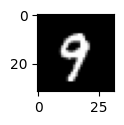

In [25]:
img_index = nparr.random.randint(0, len(img_train))
sample_image = img_train[img_index].squeeze()

gphplt.figure(figsize=(1,1))
gphplt.imshow(sample_image, cmap="gray")
print(label_train[img_index])


<div class="alert alert-block alert-success">
    <bold><b><h3>Lenet5 Architecture implemetation using Pytorch</h3></b></bold> 
</div>

In [26]:
# Define LeNet-5 architecture model
class LeNetFive(neurNet.Module):
    def __init__(self):
        super(LeNetFive, self).__init__()
        self.conv_layer1 = neurNet.Conv2d(1, 6, kernel_size=5, stride=1)
        self.pool_layer1 = neurNet.AvgPool2d(2, stride=2)
        self.conv_layer2 = neurNet.Conv2d(6, 16, kernel_size=5, stride=1)
        self.pool_layer2 = neurNet.AvgPool2d(2, stride=2)
        self.conv_layer3 = neurNet.Conv2d(16, 120, kernel_size=4, stride=1)
        
        self.fc_layer1 = neurNet.Linear(120 * 2 * 2, 84)
        self.fc_layer2 = neurNet.Linear(84, 10)

    def forward(self, input_data):
        input_data = input_data.view(-1, 1, 32, 32)
        input_data = torch.tanh(self.conv_layer1(input_data))
        input_data = self.pool_layer1(input_data)
        input_data = torch.tanh(self.conv_layer2(input_data))
        input_data = self.pool_layer2(input_data)
        input_data = torch.tanh(self.conv_layer3(input_data))
        input_data = input_data.view(input_data.size(0), -1)
        input_data = torch.tanh(self.fc_layer1(input_data))
        input_data = torch.softmax(self.fc_layer2(input_data), dim=1)
        return input_data


<div class="alert alert-block alert-success">
    <bold><b><h3>Model Initialization</h3></b></bold> 
</div>

In [27]:
lenet_five_model = LeNetFive().to(device_check)
loss_function = neurNet.CrossEntropyLoss()
optimzier_adam = optmz.Adam(lenet_five_model.parameters(), lr=0.001)


<div class="alert alert-block alert-success">
    <bold><b><h3>Accuracy calculation function</h3></b></bold> 
</div>


In [28]:
def compute_accuracy(model_eval, data_x, data_y):
    model_eval.eval()
    with torch.no_grad():
        output_vals = model_eval(data_x)
        _, predictions = torch.max(output_vals, 1)
        accuracy_score = (predictions == data_y).float().mean()
    return accuracy_score.item() * 100


<div class="alert alert-block alert-success">
    <bold><b><h3>Model training</h3></b></bold> 
</div>


In [35]:
def train_lenet_five(model_instance, data_train, labels_train, data_val, labels_val, epochs=10, batch_size=64):
    loss_train, loss_val = [], []
    accuracy_train, accuracy_val = [], []

    for epoch_num in range(1, epochs + 1):
        # Shuffle the training data and labels at the start of each epoch
        data_train, labels_train = shuffle(data_train, labels_train)

        model_instance.train()
        epoch_total_loss = 0.0

        for j in range(0, data_train.size(0), batch_size):
            batch_data_train = data_train[j:j + batch_size]
            batch_labels_train = labels_train[j:j + batch_size]
            optimzier_adam.zero_grad()
            batch_outputs = model_instance(batch_data_train)
            batch_loss = loss_function(batch_outputs, batch_labels_train)
            batch_loss.backward()
            optimzier_adam.step()
            epoch_total_loss += batch_loss.item()

        model_instance.eval()
        with torch.no_grad():
            val_outputs = lenet_five_model(img_val)
            val_loss_value = loss_function(val_outputs, label_val)
            loss_train.append(epoch_total_loss / len(img_train))
            loss_val.append(val_loss_value.item())

            train_accuracy_value = compute_accuracy(model_instance, data_train, labels_train)
            val_accuracy_value = compute_accuracy(model_instance, data_val, labels_val)
            accuracy_train.append(train_accuracy_value)
            accuracy_val.append(val_accuracy_value)

        print(f"|| Epoch {epoch_num}/{epochs} || Train Accuracy: {train_accuracy_value:.2f}% || Validation Accuracy: {val_accuracy_value:.2f}% ||")
    return loss_train, loss_val, accuracy_train, accuracy_val


In [36]:
loss_train, loss_val,accuracy_train, accuracy_val  = train_lenet_five(lenet_five_model, img_train, label_train, img_val, label_val, epochs=10)

|| Epoch 1/10 || Train Accuracy: 94.83% || Validation Accuracy: 94.46% ||
|| Epoch 2/10 || Train Accuracy: 96.57% || Validation Accuracy: 96.17% ||
|| Epoch 3/10 || Train Accuracy: 97.53% || Validation Accuracy: 96.88% ||
|| Epoch 4/10 || Train Accuracy: 98.25% || Validation Accuracy: 97.59% ||
|| Epoch 5/10 || Train Accuracy: 98.20% || Validation Accuracy: 97.54% ||
|| Epoch 6/10 || Train Accuracy: 98.72% || Validation Accuracy: 98.01% ||
|| Epoch 7/10 || Train Accuracy: 98.71% || Validation Accuracy: 98.11% ||
|| Epoch 8/10 || Train Accuracy: 98.90% || Validation Accuracy: 98.24% ||
|| Epoch 9/10 || Train Accuracy: 99.12% || Validation Accuracy: 98.43% ||
|| Epoch 10/10 || Train Accuracy: 98.96% || Validation Accuracy: 97.96% ||


<div class="alert alert-block alert-success">
    <bold><b><h3>Testing model using the test dataset</h3></b></bold> 
</div>


In [40]:
test_accuracy = compute_accuracy(lenet_five_model, img_test, label_test)
print(f"||Test Accuracy: {test_accuracy:.2f}%||")


||Test Accuracy: 97.91%||


<div class="alert alert-block alert-success">
    <bold><b><h3>Visualization for the Training accuracy and Validation accuracy </h3></b></bold> 
</div>



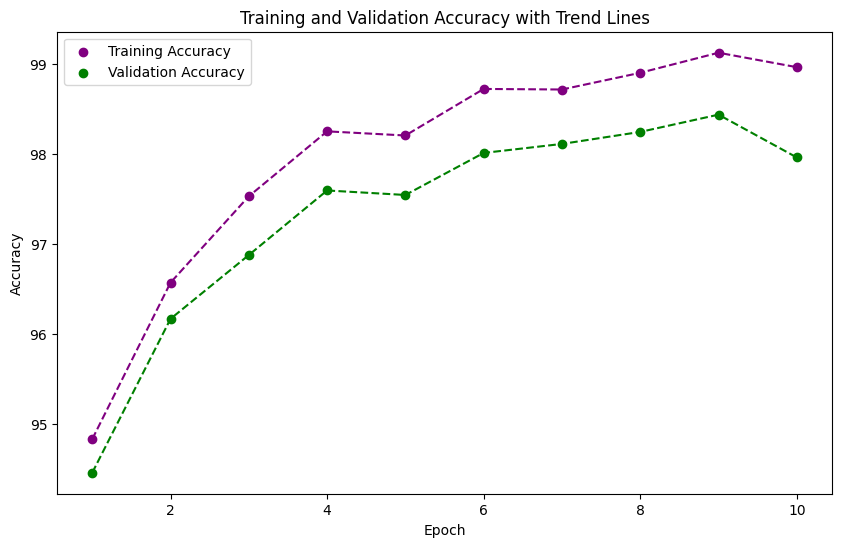

In [46]:
gphplt.figure(figsize=(10, 6))
epochs = range(1, len(accuracy_train) + 1)
gphplt.scatter(epochs, accuracy_train, label='Training Accuracy', color='purple')
gphplt.scatter(epochs, accuracy_val, label='Validation Accuracy', color='green')
gphplt.plot(epochs, accuracy_train, color='purple', linestyle='--')
gphplt.plot(epochs, accuracy_val, color='green', linestyle='--')
gphplt.xlabel('Epoch')
gphplt.ylabel('Accuracy')
gphplt.title('Training and Validation Accuracy with Trend Lines')
gphplt.legend()
gphplt.show()


<div class="alert alert-block alert-success">
    <bold><b><h3>Confusion Matrix</h3></b></bold> 
</div>


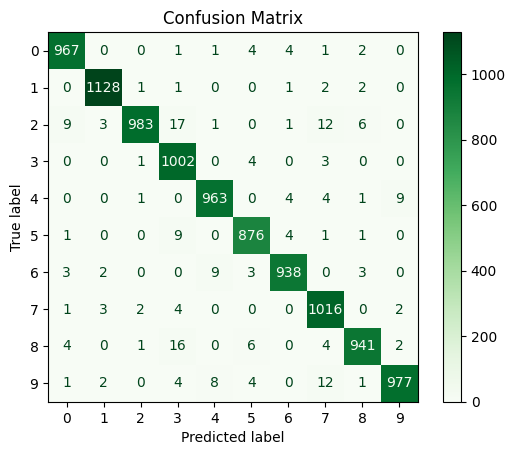

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the model predictions for the test data
def get_model_predictions(model_eval, test_set):
    model_eval.eval()
    with torch.no_grad():
        output_vals = model_eval(test_set)
        _, predicted_labels = torch.max(output_vals, 1)
    return predicted_labels

# Compute the confusion matrix with customized colors
def display_confusion_matrix(model_instance, img_test, label_test):
    predicted_labels = get_model_predictions(model_instance, img_test)
    cm = confusion_matrix(label_test, predicted_labels.cpu())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=gphplt.cm.Greens)  # Using 'Greens' color map for variation
    gphplt.title("Confusion Matrix")
    gphplt.show()

display_confusion_matrix(lenet_five_model, img_test, label_test)
